In [2]:
# Inicialización e importación de módulos

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

fig_sz_x = 10
fig_sz_y = 9
fig_dpi = 150 # dpi

fig_font_size = 12

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
#plt.rcParams.update({'font.size':fig_font_size})

In [3]:
# Ahora importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS

from pytc2.general import print_subtitle

In [4]:
def sim_aprox(aproxs, orders2analyze, ripple, attenuation):

    all_sys = []
    filter_names = []

    for (this_aprox, this_order, this_ripple, this_att) in zip(aproxs, orders2analyze, ripple, attenuation):

        if this_aprox == 'Butterworth':

            z,p,k = sig.buttap(this_order)

            eps = np.sqrt( 10**(this_ripple/10) - 1 )
            num, den = sig.zpk2tf(z,p,k)
            num, den = sig.lp2lp(num, den, eps**(-1/this_order))

            z,p,k = sig.tf2zpk(num, den)

        elif this_aprox == 'Chebyshev1':

            z,p,k = sig.cheb1ap(this_order, this_ripple)

        elif this_aprox == 'Chebyshev2':

            z,p,k = sig.cheb2ap(this_order, this_att)

        elif this_aprox == 'Bessel':

            z,p,k = sig.besselap(this_order, norm='delay')

        elif this_aprox == 'Cauer':

            z,p,k = sig.ellipap(this_order, this_ripple, this_att)


        num, den = sig.zpk2tf(z,p,k)

        
        all_sys.append(sig.TransferFunction(num,den))

        this_label = this_aprox + '_ord_' + str(this_order) + '_rip_' + str(this_ripple)+ '_att_' + str(this_att)
        
        print_subtitle(this_label)
        # factorizamos en SOS's
        this_sos = tf2sos_analog(num, den)
        
        pretty_print_SOS(this_sos, mode='omegayq')
        
        filter_names.append(this_label)
        

    analyze_sys( all_sys, filter_names )

#### Aproximaciones de Chebyshev

#### Chebyshev1_ord_3_rip_0.5_att_24

<IPython.core.display.Math object>

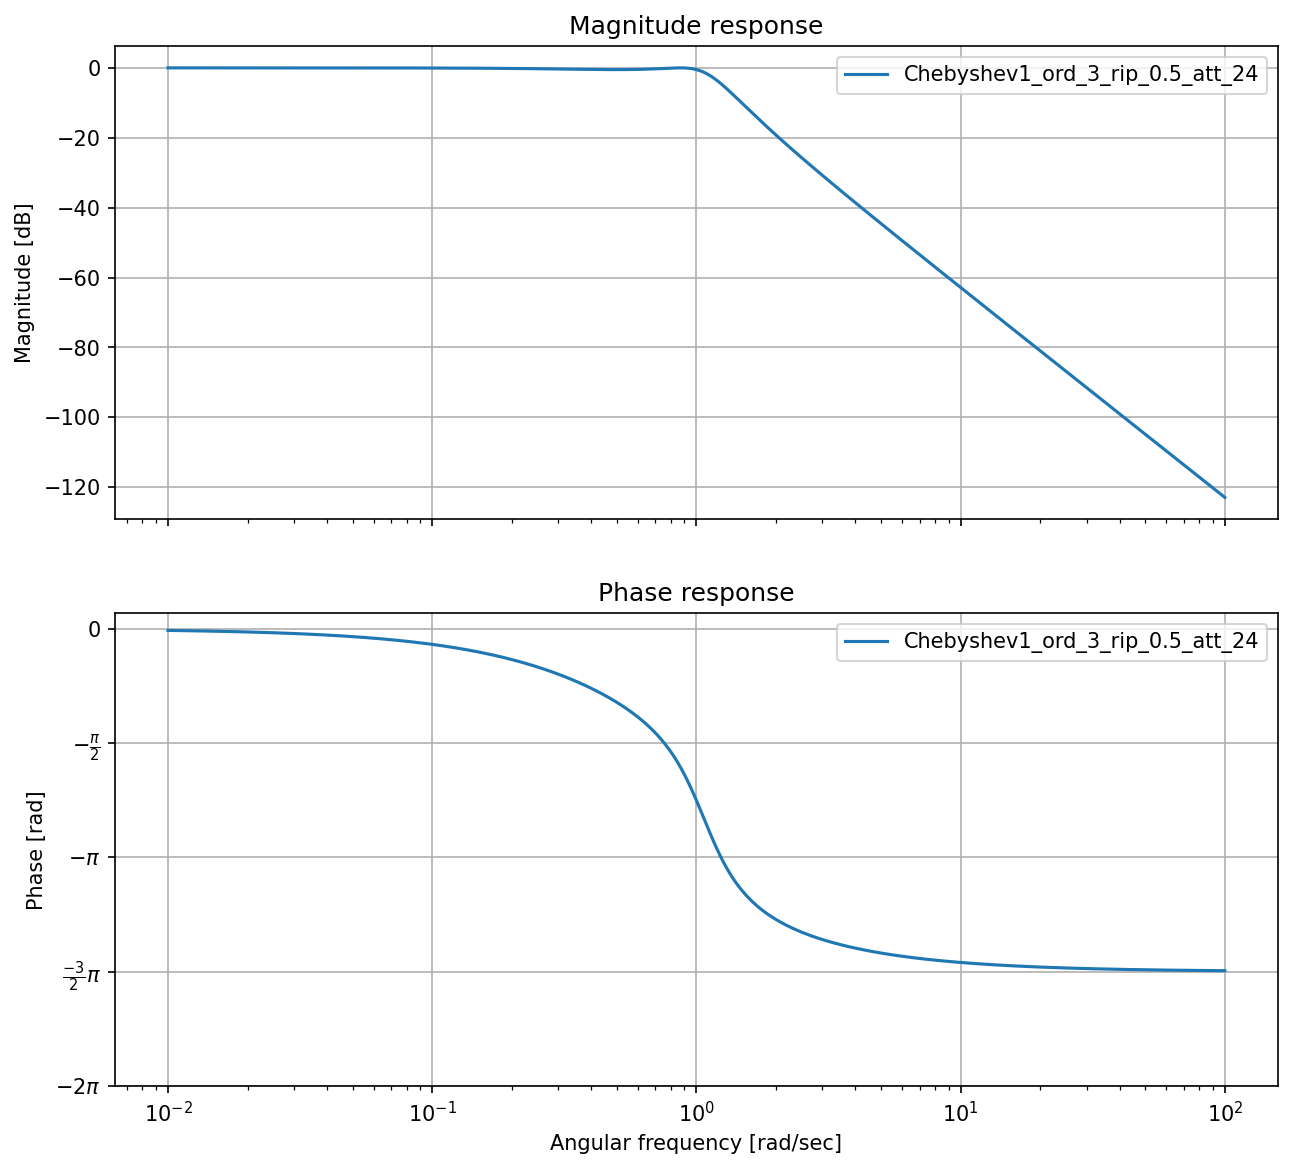

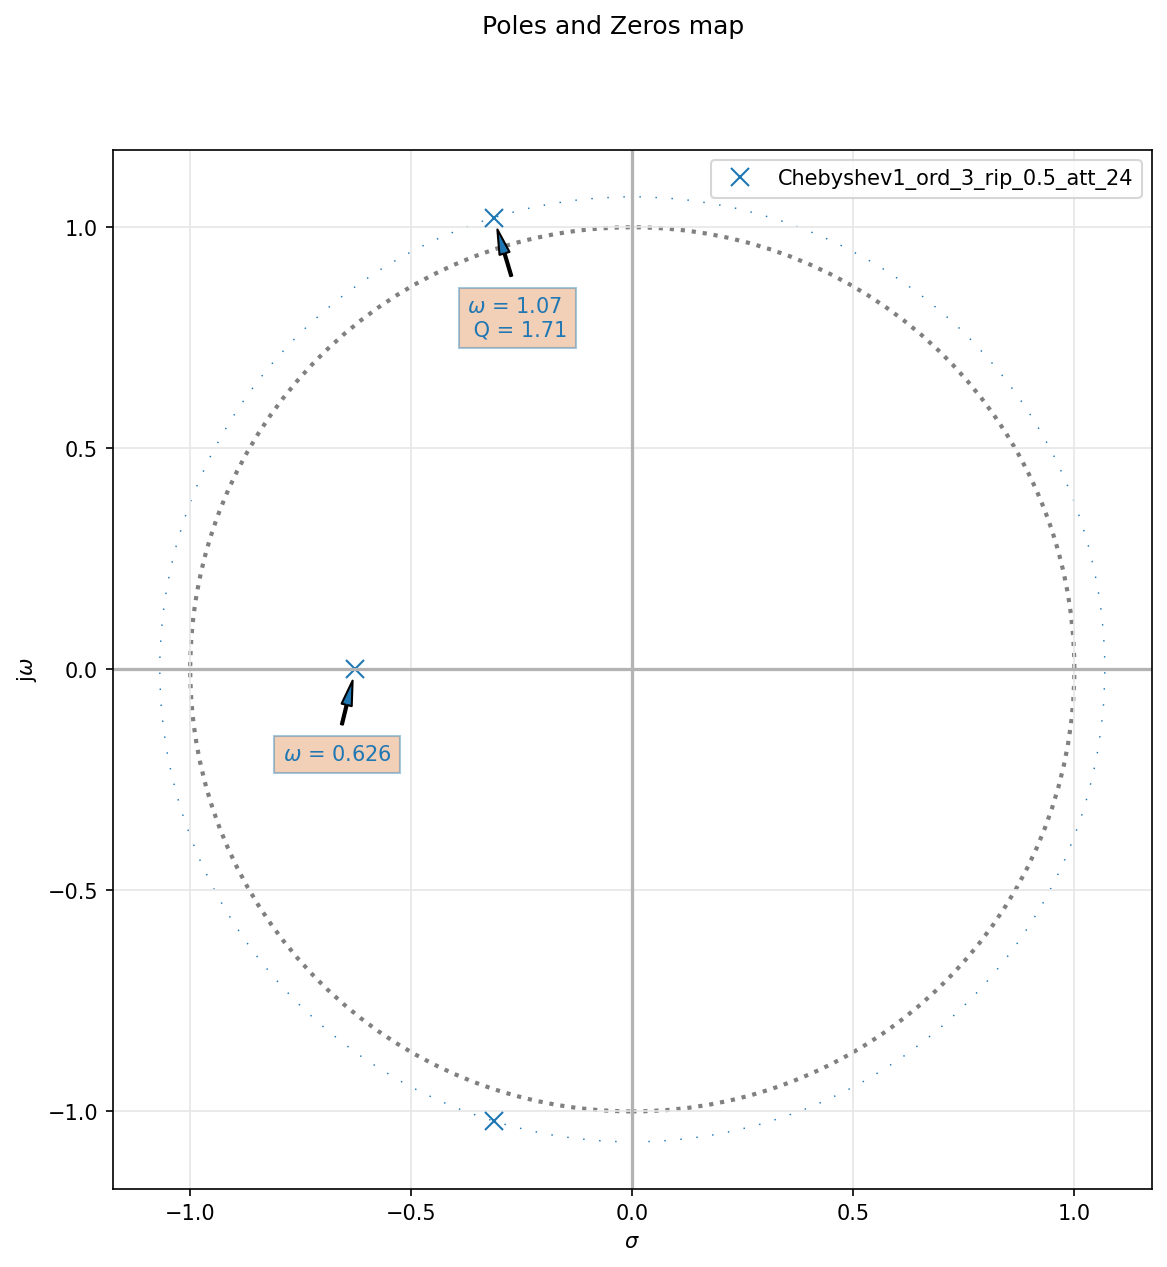

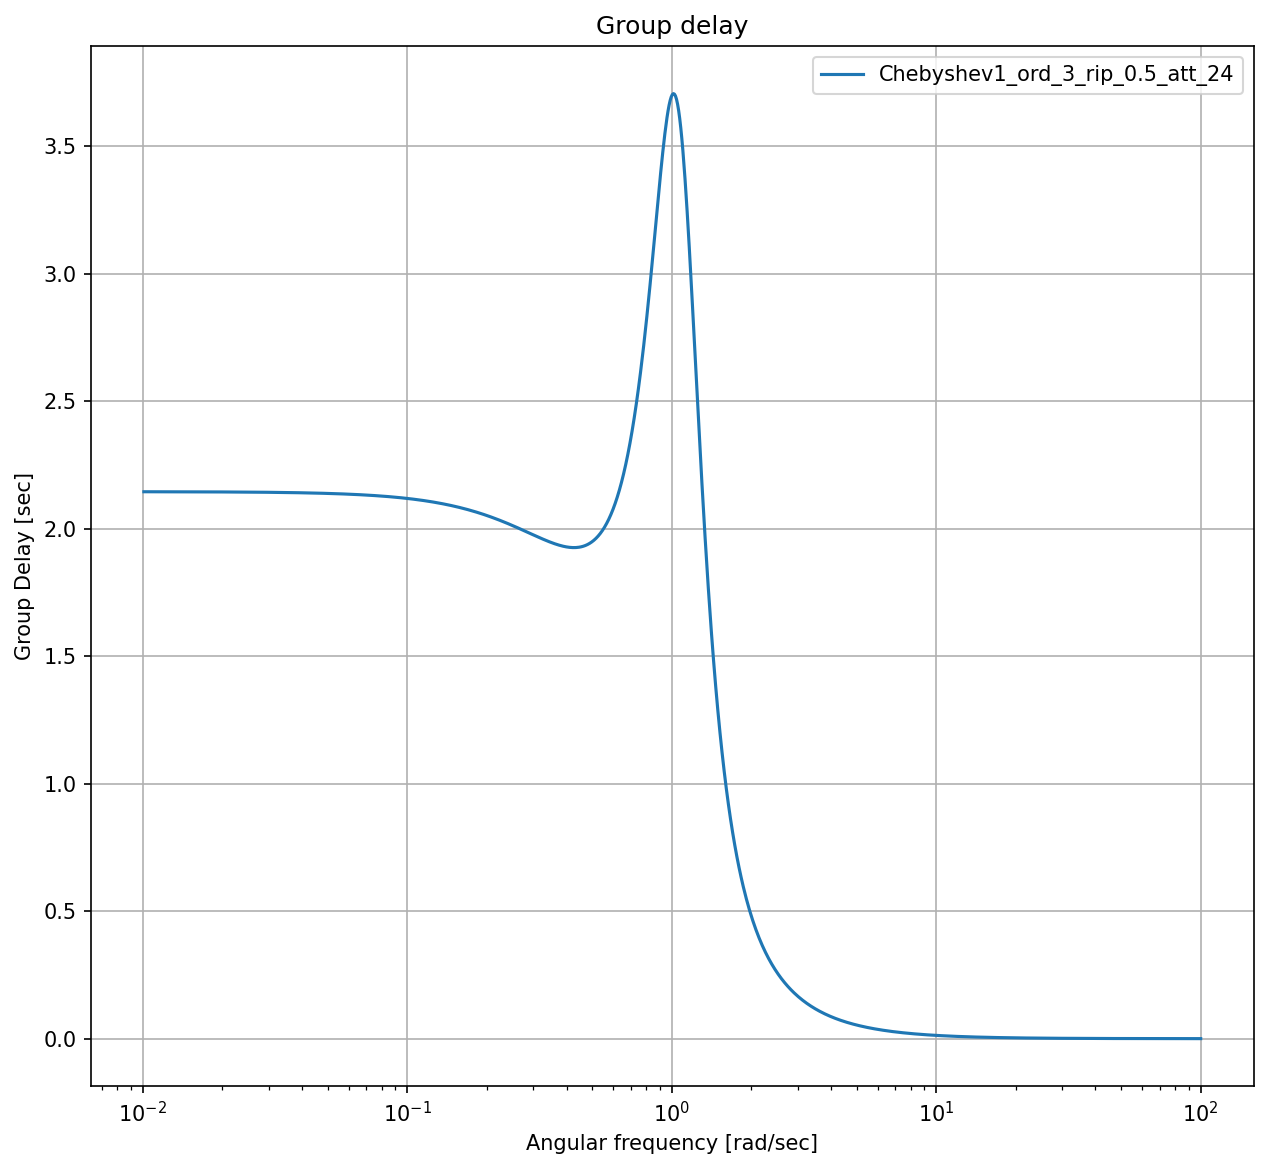

In [13]:
#aprox_name = 'Butterworth'
aprox_name = 'Chebyshev1'
#aprox_name = 'Chebyshev2'
#aprox_name = 'Bessel'
#aprox_name = 'Cauer'

# parametrizamos el orden para cada aproximación
orders2analyze = [3]

# Mismo requerimiento de ripple y atenuación
aproxs = [aprox_name] * len(orders2analyze)
ripple = [0.5] * len(orders2analyze) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [24] * len(orders2analyze) # dB \alpha_{min} <-- Sin parametrizar, att fija


print_subtitle('Aproximaciones de Chebyshev')

sim_aprox(aproxs, orders2analyze, ripple, attenuation)

In [5]:
import numpy as np
import scipy.signal as sig
from IPython.display import display, Markdown

In [6]:
# Ahora importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle

In [7]:
# coeficientes de la transferencia de primer orden T1
T1_num = np.array([0.6264])
T1_den = np.array([1, 0.6264])

# Q de la transformación
Q_bp = 5

# núcleo LP-BP
num_pbanda, den_pbanda = sig.lp2bp(T1_num, T1_den, bw = 1/Q_bp)

display(Markdown('### Filtro pasabanda segundo orden normalizado Q = 5' ))

print_subtitle('Como lo muestra SciPy')

print(num_pbanda)
print(den_pbanda)

print_subtitle('Como cociente de polinomios')

# forma un poco más clara
pretty_print_lti(num_pbanda, den_pbanda)

print_subtitle('Factorizado con $\omega_0$ y $Q$')

# esta es la que va
pretty_print_bicuad_omegayq(num_pbanda, den_pbanda)

### Filtro pasabanda segundo orden normalizado Q = 5

#### Como lo muestra SciPy

[0.12528 0.     ]
[1.      0.12528 1.     ]


#### Como cociente de polinomios

<IPython.core.display.Math object>

#### Factorizado con $\omega_0$ y $Q$

<IPython.core.display.Math object>

In [7]:
T1_bp =  sig.TransferFunction( num_pbanda, den_pbanda )

analyze_sys(T1_bp, sys_name='pasabanda 2do orden Q={:d}'.format(Q_bp))

NameError: name 'num_pbanda' is not defined

In [8]:
# coeficientes de la transferencia de primer orden T1
T2_num = np.array([1.143])
T2_den = np.array([1, (1.069/1.706), 1.069**2])

# Q de la transformación
Q_bp = 5

# núcleo LP-BP
num_pbanda, den_pbanda = sig.lp2bp(T2_num, T2_den, bw = 1/Q_bp)

display(Markdown('### Filtro pasabanda cuarto orden normalizado Q = 5' ))

print_subtitle('Como lo muestra SciPy')

print(num_pbanda)
print(den_pbanda)

print_subtitle('Como cociente de polinomios')

# forma un poco más clara
pretty_print_lti(num_pbanda, den_pbanda)

# esta es la que va

print_subtitle('Factorizado en SOS')

sos_pbanda = tf2sos_analog(num_pbanda, den_pbanda)

# la visualizamos de algunas formas, la tradicional
pretty_print_SOS(sos_pbanda)

print_subtitle('Factorizado y parametrizado')

pretty_print_SOS(sos_pbanda, mode='omegayq')

### Filtro pasabanda cuarto orden normalizado Q = 5

#### Como lo muestra SciPy

[0.04572 0.      0.     ]
[1.         0.12532239 2.04571044 0.12532239 1.        ]


#### Como cociente de polinomios

<IPython.core.display.Math object>

#### Factorizado en SOS

<IPython.core.display.Math object>

#### Factorizado y parametrizado

<IPython.core.display.Math object>

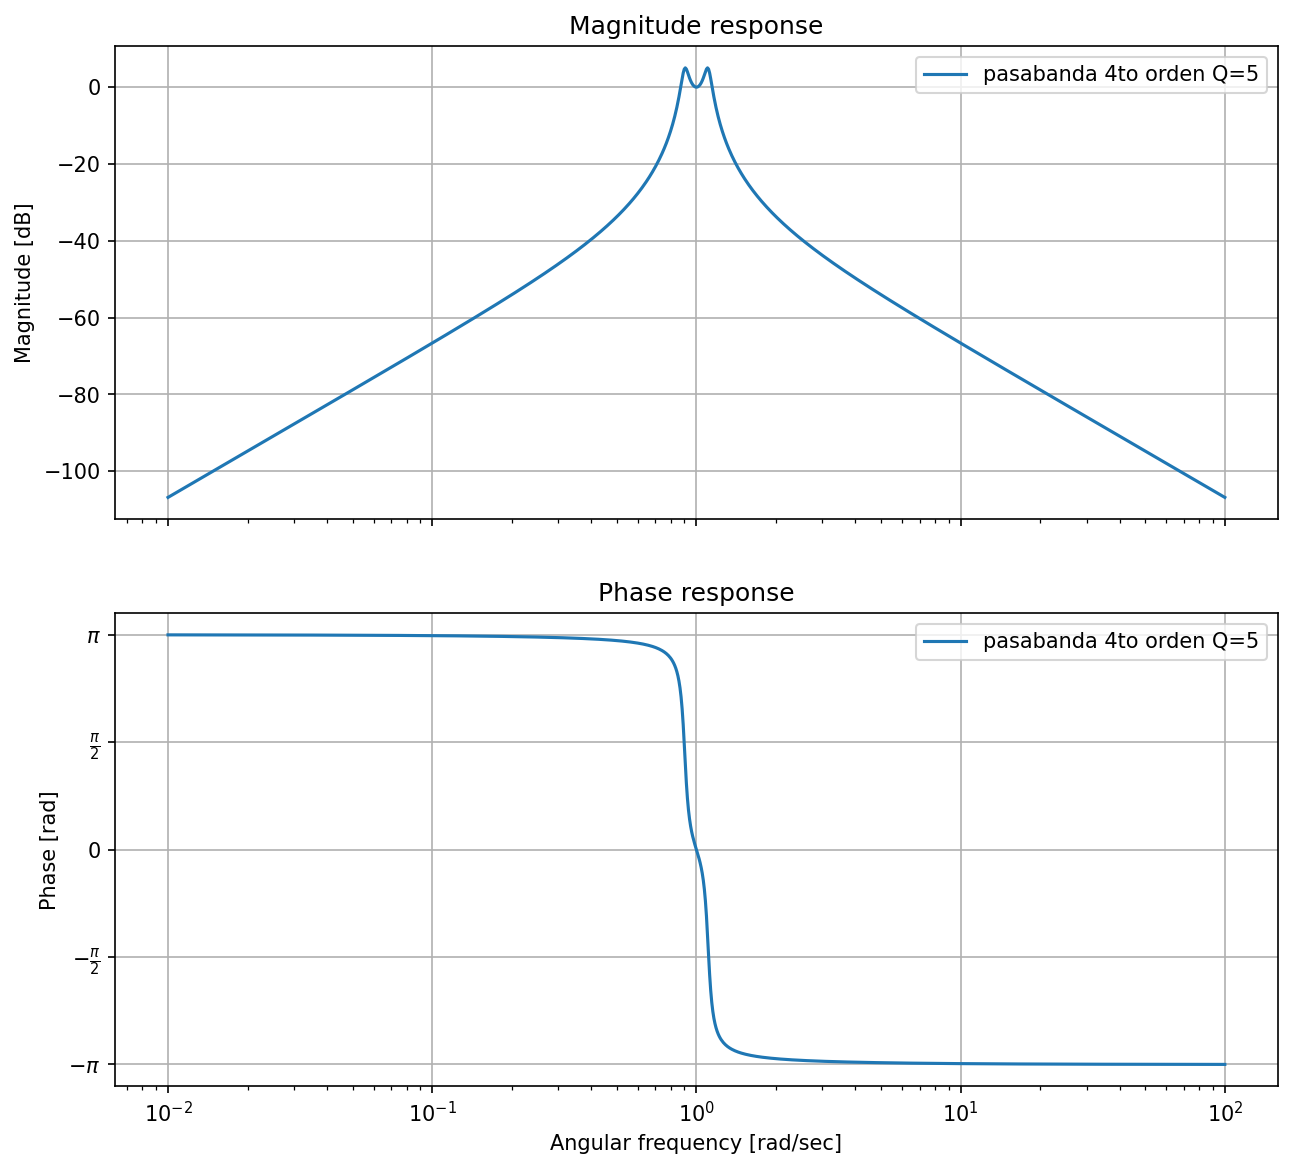

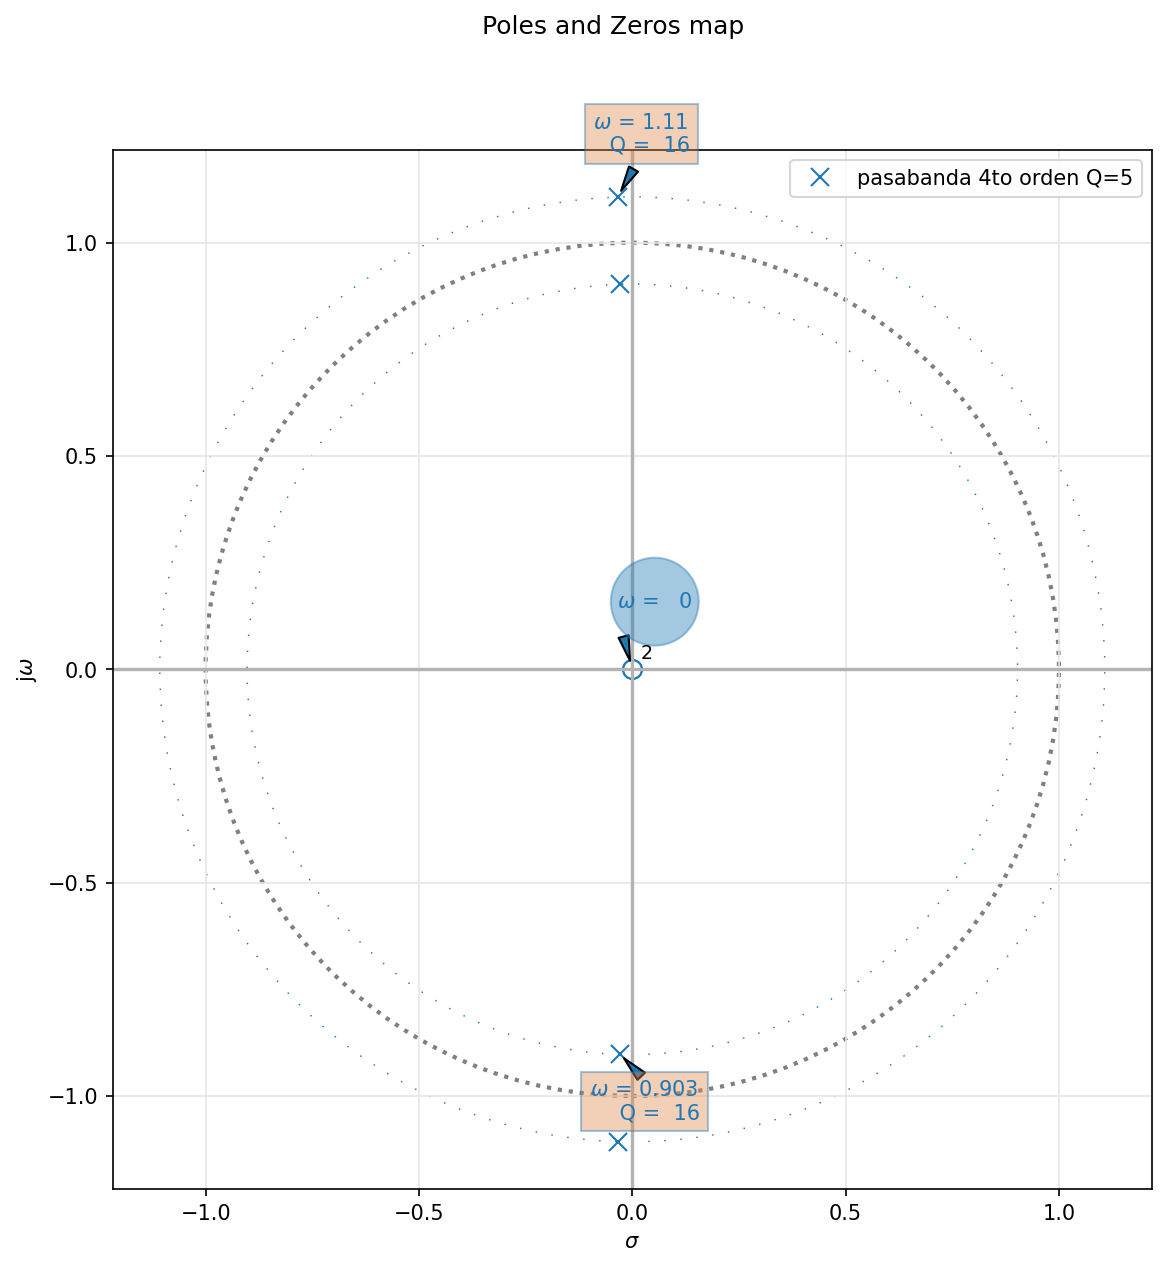

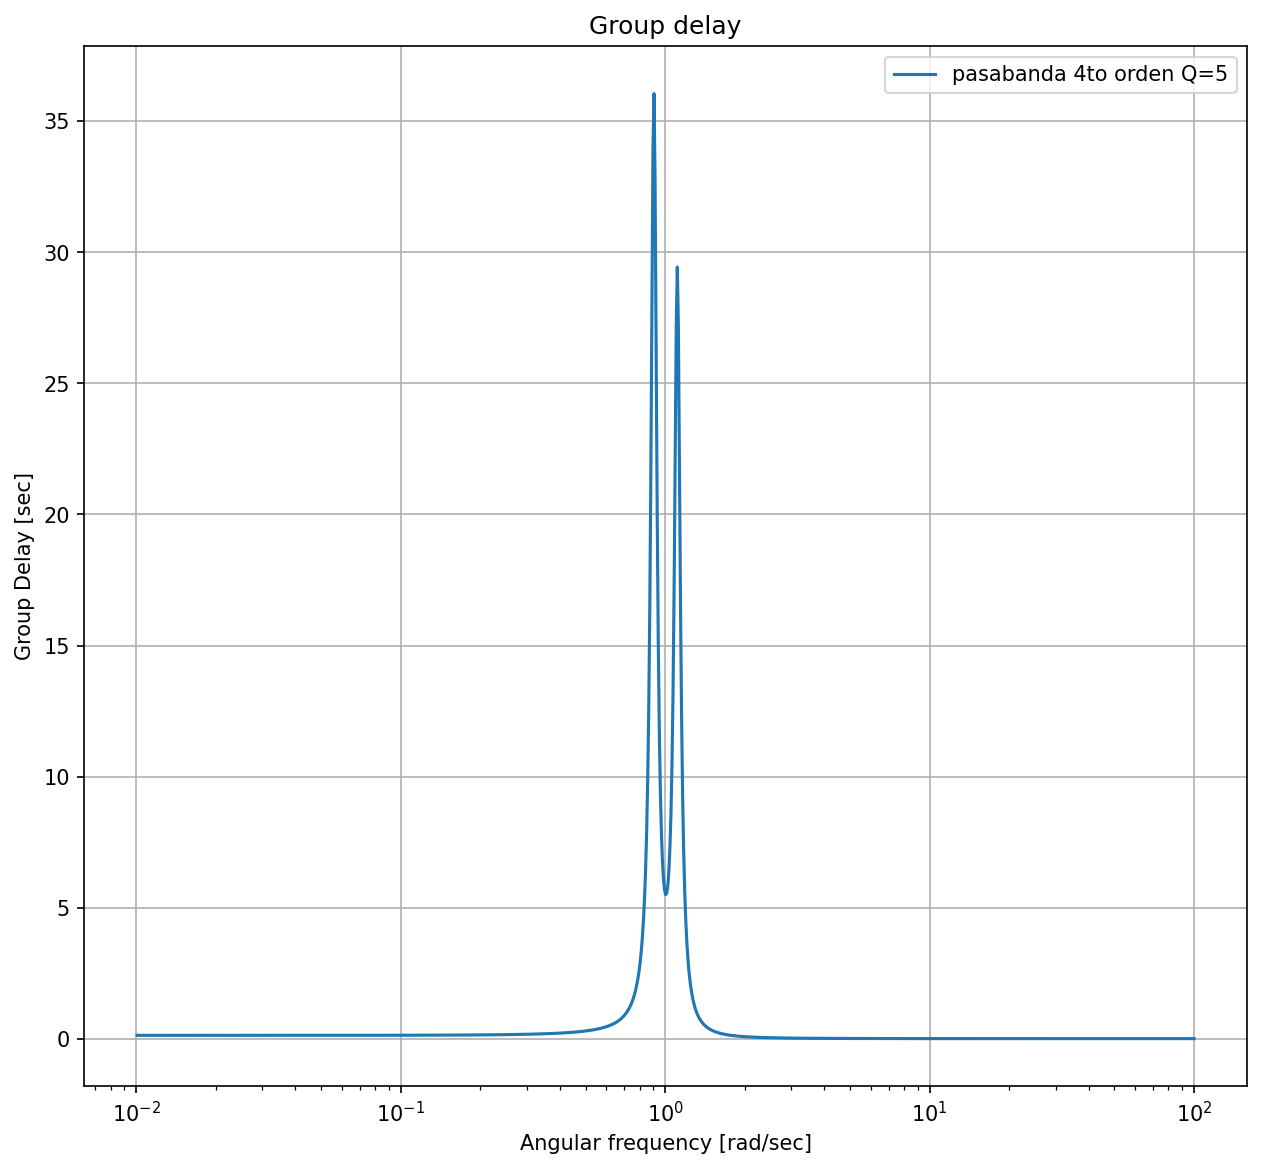

In [12]:
T1_bp =  sig.TransferFunction( num_pbanda, den_pbanda )

analyze_sys(T1_bp, sys_name='pasabanda 4to orden Q={:d}'.format(Q_bp))